## Neural Network Isopotopomer Analysis

### Step 1 - Data simulation:

- All data now simulated, find sim data in the relevant sim save. More/diverse datasets can be created to train the networks even further

In [2]:
import pandas as pd
from metabolabpytools import isotopomerAnalysis
analysis = isotopomerAnalysis.IsotopomerAnalysisNN()

# Define the HSQC vector externally
hsqc_vector = [0, 1, 0] # For 3-carbon metabolites, all carbons participate in HSQC
n_carbons = len(hsqc_vector)

# Example usage
synthetic_distributions = analysis.generate_isotopomer_distributions(n_distributions=1000, n_carbons=n_carbons)  


# Simulate HSQC and GC-MS data for all distributions with the defined HSQC vector
combined_isotopomer_data, combined_hsqc_data, combined_gcms_data = analysis.simulate_hsqc_gcms(synthetic_distributions, hsqc_vector)

# Save the simulation data to a spreadsheet
analysis.save_simulation_data(combined_isotopomer_data, combined_hsqc_data, combined_gcms_data, hsqc_vector)

Data successfully saved to sim_data/sim_010.xlsx


### Step 2 - Data preparation:

-Using [0, 1, 1, 0] as example 

In [6]:
from metabolabpytools import isotopomerAnalysis
analysis = isotopomerAnalysis.IsotopomerAnalysisNN()

# Example usage for HSQC vector [0,1,1, 0]
hsqc_vector = [0, 1, 1, 0]
num_carbons = len(hsqc_vector)
isotopomer_data, hsqc_data, gcms_data = analysis.load_spreadsheet_by_hsqc_vector(hsqc_vector)

all_possible_hsqc_multiplets = analysis.generate_possible_hsqc_multiplets(hsqc_vector)

Y = analysis.collate_y_labels(isotopomer_data, num_carbons)

X_noisy = analysis.collate_x_labels_without_noise(hsqc_data, gcms_data, all_possible_hsqc_multiplets)


# # Now Y contains the isotopomer percentages for each sample, structured for training a neural network
print(Y[7])
print(X_noisy[7])

[44.77626703  9.64497454  5.64510035  0.          5.8507274   0.
  0.          0.          8.16475425  0.         10.83805303  3.35811042
  0.          0.          0.         11.72201297]
[34.18004628  0.81261443 64.37895144  0.62838785 51.70025895 11.15246416
  0.73995497 36.40732192 44.77626703 29.30555654 10.83805303  3.35811042
 11.72201297]


### Step 3 - Train a Neural Network:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,656 (49.44 KB)

 Trainable params: 12,656 (49.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 43.7618 - mae: 3.2031 - val_loss: 12.0061 - val_mae: 1.8994
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.3502 - mae: 1.9075 - val_loss: 10.5454 - val_mae: 1.7008
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.0408 - mae: 1.7566 - val_loss: 10.2635 - val_mae: 1.6596
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.6217 - mae: 1.6973 - val_loss: 10.2219 - val_mae: 1.6915
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.4284 - mae: 1.7006 - val_loss: 8.9840 - val_mae: 1.5909
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2196 - mae: 1.6104 - val_loss: 8.2968 - val_mae: 1.4910
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7760 - mae: 1.5690 - val_loss: 8.2865 - val_mae: 1.4810
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7784 - mae: 1.5603 - val_loss: 7.6377 - val_mae: 1.4621
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━

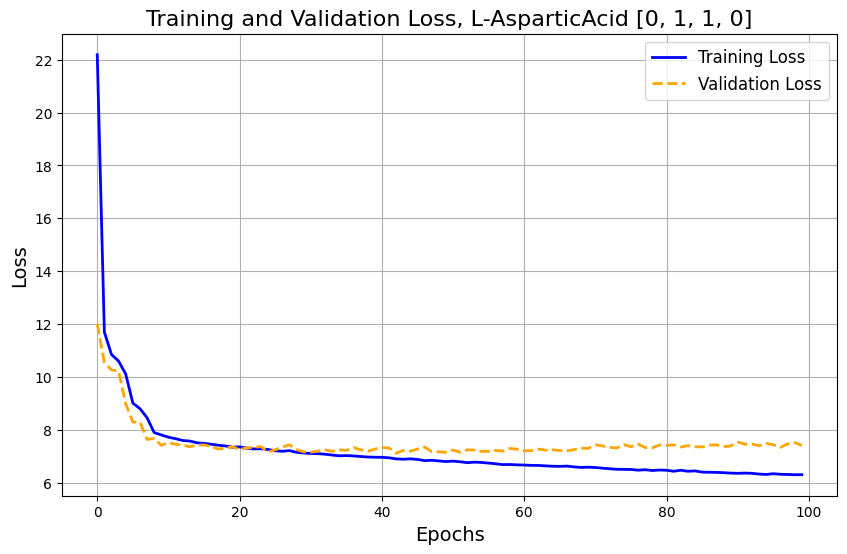

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 7.4004 - mae: 1.3397
Validation Loss: 7.411983489990234, Validation MAE: 1.3596224784851074
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicted: [48.61846    0.         0.         0.         5.3512545  8.49813
  0.         0.         0.        13.463083   9.031      0.
  0.         0.         0.        14.394455 ], Actual: [49.90685205  0.          0.          0.          2.9094171  15.71992325
  0.          0.          0.          0.         13.97035494  0.
  0.          1.77730845  0.         15.7161442 ]
Predicted: [87.935295    0.          2.0574784   0.10341044  1.0270783   0.28742298
  1.1797224   1.382278    0.          0.          0.          0.71339446
  0.          0.76636463  0.          1.3488626 ], Actual: [88.07006922  0.          1.41988113  0.18074497  0.          0.
  1.0559066   1.1638207   1.29653202  1.68747382  0.          1.44624553
  0.95477224  1.05000387  0.11705962  1.55749027]
Predicted: [90.20056     0.        

In [2]:
# Train the neural network
model, history = analysis.train_neural_network(X_noisy, Y, epochs=100, batch_size=32)

### Step 4 - Hyperparamter Tuning:

Reloading Tuner from tuning_dir\metabolite_tuning_0_1_1_0\tuner0.json
Search space summary
Default search space size: 10
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
l2_lambda (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_2 (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default

C:\Users\raath\metabolabpytools\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 6.1856 - mae: 1.4823 - val_loss: 5.2125 - val_mae: 1.3020
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.1236 - mae: 1.4706 - val_loss: 5.5157 - val_mae: 1.3651
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.0322 - mae: 1.4629 - val_loss: 5.2175 - val_mae: 1.2695
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.7547 - mae: 1.4179 - val_loss: 5.3001 - val_mae: 1.3087
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.7958 - mae: 1.4318 - val_loss: 5.3969 - val_mae: 1.3095
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.7555 - mae: 1.4151 - val_loss: 5.4824 - val_mae: 1.3138
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.6337 - mae: 1.4013 - val_loss: 5.3742 - val_mae: 1.2884
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.7297 - mae: 1.4106 - val_loss: 5.4846 - val_mae: 1.2859
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss:

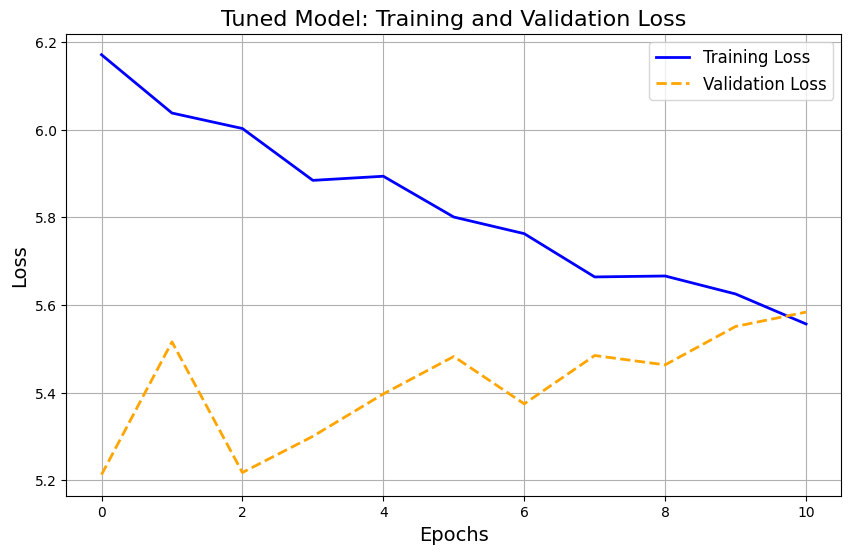

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1903 - mae: 1.2885
Validation Loss: 5.212480545043945, Validation MAE: 1.3019987344741821
Model saved as model_hsqc_0_1_1_0.keras in saved_models
Model summary saved as model_summaries\model_summary_model_hsqc_0_1_1_0.keras.csv
Sample 1 - Predicted Mean: [4.6261425e+01 8.6933754e-02 1.3163246e-01 8.0110379e-02 3.2529624e+00
 1.3827475e+01 7.6472357e-02 1.3595770e-01 4.6090860e-02 4.5293121e+00
 1.2662819e+01 3.3882178e-02 3.5546479e-01 1.3705612e+00 1.0632778e-01
 1.7042585e+01], Standard Deviation: [1.9620156  0.27501857 0.3426255  0.35567057 1.6285079  2.5843604
 0.36533833 0.51042736 0.21265694 1.0895573  2.4884534  0.24765576
 0.6742204  1.0990283  0.40869892 2.0026422 ]
Sample 2 - Predicted Mean: [8.8955818e+01 5.1608402e-01 1.1182530e+00 1.1179281e+00 4.1477174e-01
 3.2632595e-01 1.4332993e+00 1.1533695e+00 7.3637521e-01 6.5795690e-01
 5.1393980e-01 1.4080881e+00 2.8111184e-01 1.5512693e-02 2.1916337e-01
 1.1320057e+00], Standard D

In [3]:
hsqc_vector = [0, 1, 1, 0]  # Replace with your actual HSQC vector

# Tune the model, save it, and generate a summary
best_model, X_val, Y_val, mean_pred, std_dev_pred = analysis.tune_model(X_noisy, Y, hsqc_vector)

# Make predictions
predictions = best_model.predict(X_val)

# Example: Comparing normalized predictions with actual Y values
for i in range(5):
    print(f"Predicted: {predictions[i]}, Actual: {Y_val[i]}")

### Step 5 - Fitting to real data:

example used [0 ,1, 1] . Simply change the HSQC vector and metabolite name and the results directory will be updated.

In [1]:
from metabolabpytools import isotopomerAnalysis
import os
import numpy as np

ia_nn = isotopomerAnalysis.IsotopomerAnalysisNN()

hsqc_data_file = os.path.join(os.getcwd(), 'hsqcData1.xlsx')
gcms_data_file = os.path.join(os.getcwd(), 'gcmsData1.xlsx')
ia_nn.load_hsqc_and_gcms_data(hsqc_data_file, gcms_data_file)

# Inspect the data for a specific metabolite
metabolite_name = "L-LacticAcid"  
ia_nn.inspect_metabolite_data(metabolite_name)
X_real_data = ia_nn.create_feature_vectors(metabolite_name)


model_path = 'saved_models/model_hsqc_0_1_1.keras'
mean_predictions, std_dev_predictions, predicted_distributions = ia_nn.load_model_and_predict(model_path, X_real_data)


# Step 2: Simulate HSQC and GC-MS data from the predicted distributions
hsqc_vector = [0, 1, 1]
predicted_hsqc_data, predicted_gcms_data = ia_nn.simulate_from_predictions(predicted_distributions, hsqc_vector)



combined_vector = ia_nn.combine_hsqc_gcms(predicted_hsqc_data, predicted_gcms_data)

mean_predictions_sim, std_dev_predictions_sim, predicted_distributions_sim = ia_nn.load_model_and_predict(model_path, combined_vector)

# Save the results to an Excel file
ia_nn.save_results_summary(X_real_data, predicted_distributions_sim, std_dev_predictions_sim, 
                           predicted_hsqc_data, predicted_gcms_data, hsqc_vector)


HSQC and GC-MS data loaded successfully.
HSQC Multiplets for L-LacticAcid:
Experiment 1: [[2], [2, 1], [2, 3], [2, 1, 3], [3], [3, 2]]
Experiment 2: [[2], [2, 1], [2, 3], [2, 1, 3], [3], [3, 2]]
Experiment 3: [[2], [2, 1], [2, 3], [2, 1, 3], [3], [3, 2]]

HSQC Multiplet Percentages for L-LacticAcid:
Experiment 1: [5.046, 0.711, 93.668, 0.575, 14.348, 85.652]
Experiment 2: [5.264, 0.59, 93.359, 0.787, 15.459, 84.541]
Experiment 3: [4.072, 0.0, 95.928, 0.0, 14.233, 85.767]

GC-MS Percentages for L-LacticAcid:
Experiment 1: [73.17, 4.01, 22.52, 0.3]
Experiment 2: [73.17, 4.01, 22.52, 0.3]
Experiment 3: [73.17, 4.01, 22.52, 0.3]



C:\Users\raath\metabolabpytools\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Mean Predictions: [[7.42635345e+01 1.68623757e+00 1.15305468e-01 2.24742470e+01
  1.36313808e+00 2.27159835e-04 6.98414668e-02 2.75341142e-02]
 [7.46804810e+01 1.38059998e+00 1.06973946e-01 2.22575760e+01
  1.50195611e+00 8.98522616e-04 2.49722153e-02 4.65337001e-02]
 [7.23560486e+01 3.84980488e+00 4.54816259e-02 2.35482101e+01
  1.66886002e-01 0.00000000e+00 1.12955673e-02 2.22139359e-02]]
Standard Deviation of Predictions: [[2.4084394  1.5638033  0.40906182 1.541452   1.7579443  0.00531449
  0.32595164 0.22496772]
 [2.3826163  1.452036   0.37267354 1.5419104  1.7987074  0.02839983
  0.20422752 0.2910626 ]
 [2.4118109  2.0248964  0.24861647 1.4978073  0.6462201  0.
  0.1166477  0.24617846]]


C:\Users\raath\metabolabpytools\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Mean Predictions: [[7.5672218e+01 5.6762475e-01 1.4602726e-02 2.1876829e+01 1.7339494e+00
  0.0000000e+00 3.4705983e-03 1.3134868e-01]
 [7.6564964e+01 3.4157035e-01 8.6238384e-03 2.1720467e+01 1.2322688e+00
  1.8205969e-03 1.5500712e-04 1.3016203e-01]
 [7.3947395e+01 1.4937001e+00 1.1017036e-02 2.2910133e+01 1.5680845e+00
  1.1760801e-02 0.0000000e+00 5.7946078e-02]]
Standard Deviation of Predictions: [[2.519449   1.0669277  0.13643666 1.5223061  1.9786168  0.
  0.05928669 0.46364257]
 [2.3330433  0.7814041  0.09067564 1.4441699  1.7096235  0.05754368
  0.00489931 0.48453486]
 [2.395041   1.445141   0.10044881 1.4622089  1.7884381  0.19293457
  0.         0.2891788 ]]
Results successfully saved to nn_analysis_results\results_summary_hsqc_0_1_1.xlsx
